# Data Loading and Basic Data Inspection

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv("../Data/Raw/bridge_dataset.csv")
df.head()

,timestamp,bridge_id,sensor_id,acceleration_x,acceleration_y,acceleration_z,temperature_c,humidity_percent,wind_speed_mps,fft_peak_freq,fft_magnitude,degradation_score,structural_condition,damage_class,forecast_score_next_30d
0,2020-01-01 00:00:00,B001,S4,-0.428902,0.009163,-0.448430,24.263205,82.573476,9.129824,3.264360,1.393159,75.155898,3,Severe,83.164753
1,2020-01-01 00:15:00,B003,S3,0.086893,-0.005482,0.422973,19.343838,83.545112,6.676185,1.290251,0.190976,10.844521,0,No Damage,16.168653
2,2020-01-01 00:30:00,B003,S3,-0.168531,-0.703500,-0.403903,18.021082,41.881540,1.084121,4.899752,1.402845,61.673974,2,Moderate,65.254881
3,2020-01-01 00:45:00,B002,S3,-0.242926,-0.046838,-0.359685,19.908278,81.787200,0.003722,2.347590,0.659239,26.573856,1,Minor,29.030163
4,2020-01-01 01:00:00,B001,S2,0.175638,0.000792,-0.242574,30.995286,89.394147,1.032235,0.928626,0.733460,38.942145,1,Minor,34.534451


In [139]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1340 non-null   object 
 1   bridge_id                1340 non-null   object 
 2   sensor_id                1340 non-null   object 
 3   acceleration_x           1340 non-null   float64
 4   acceleration_y           1340 non-null   float64
 5   acceleration_z           1340 non-null   float64
 6   temperature_c            1340 non-null   float64
 7   humidity_percent         1340 non-null   float64
 8   wind_speed_mps           1340 non-null   float64
 9   fft_peak_freq            1340 non-null   float64
 10  fft_magnitude            1340 non-null   float64
 11  degradation_score        1340 non-null   float64
 12  structural_condition     1340 non-null   int64  
 13  damage_class             1340 non-null   object 
 14  forecast_score_next_30d 

In [140]:
df.describe()

,acceleration_x,acceleration_y,acceleration_z,temperature_c,humidity_percent,wind_speed_mps,fft_peak_freq,fft_magnitude,degradation_score,structural_condition,forecast_score_next_30d
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,0.000152,-0.011864,0.000679,25.185745,59.835657,7.602270,2.766077,0.796044,40.006657,1.144030,42.061030
std,0.289156,0.293730,0.302737,4.975551,17.406105,4.323423,1.295362,0.400528,23.176780,0.901083,23.364907
min,-0.872300,-1.148754,-0.901086,7.199972,30.055872,0.003722,0.502477,0.100175,0.000000,0.000000,0.000000
25%,-0.202702,-0.215941,-0.199720,21.700007,45.067341,4.009694,1.644356,0.460055,22.923354,0.000000,25.325317
50%,0.001418,-0.005285,-0.002043,25.243176,59.579153,7.554818,2.795782,0.779085,39.564736,1.000000,41.552017
75%,0.197210,0.186663,0.204599,28.608905,75.437770,11.380112,3.892378,1.142222,56.702977,2.000000,58.864470
max,0.958277,0.918312,1.022132,41.531937,89.997414,14.987683,4.996015,1.499450,100.000000,3.000000,100.000000


In [141]:
df.isnull().sum()

timestamp                  0
bridge_id                  0
sensor_id                  0
acceleration_x             0
acceleration_y             0
acceleration_z             0
temperature_c              0
humidity_percent           0
wind_speed_mps             0
fft_peak_freq              0
fft_magnitude              0
degradation_score          0
structural_condition       0
damage_class               0
forecast_score_next_30d    0
dtype: int64

In [142]:
df.duplicated().sum()

np.int64(0)

In [143]:
print(df.shape)
print(df.columns)

(1340, 15)
Index(['timestamp', 'bridge_id', 'sensor_id', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'temperature_c', 'humidity_percent',
       'wind_speed_mps', 'fft_peak_freq', 'fft_magnitude', 'degradation_score',
       'structural_condition', 'damage_class', 'forecast_score_next_30d'],
      dtype='object')


In [144]:
df["timestamp"] = pd.to_datetime(df["timestamp"] , format= "%Y-%m-%d %H:%M:%S"  , errors="coerce")

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                1340 non-null   datetime64[ns]
 1   bridge_id                1340 non-null   object        
 2   sensor_id                1340 non-null   object        
 3   acceleration_x           1340 non-null   float64       
 4   acceleration_y           1340 non-null   float64       
 5   acceleration_z           1340 non-null   float64       
 6   temperature_c            1340 non-null   float64       
 7   humidity_percent         1340 non-null   float64       
 8   wind_speed_mps           1340 non-null   float64       
 9   fft_peak_freq            1340 non-null   float64       
 10  fft_magnitude            1340 non-null   float64       
 11  degradation_score        1340 non-null   float64       
 12  structural_condition     1340 non-

In [146]:
# Create a 'date' column (YYYY-MM-DD)
df["date"] = df["timestamp"].dt.date

#create a "time" column (HH:MM:SS)
df["time"] = df["timestamp"].dt.time

In [147]:
df.head()

,timestamp,bridge_id,sensor_id,acceleration_x,acceleration_y,acceleration_z,temperature_c,humidity_percent,wind_speed_mps,fft_peak_freq,fft_magnitude,degradation_score,structural_condition,damage_class,forecast_score_next_30d,date,time
0,2020-01-01 00:00:00,B001,S4,-0.428902,0.009163,-0.448430,24.263205,82.573476,9.129824,3.264360,1.393159,75.155898,3,Severe,83.164753,2020-01-01,00:00:00
1,2020-01-01 00:15:00,B003,S3,0.086893,-0.005482,0.422973,19.343838,83.545112,6.676185,1.290251,0.190976,10.844521,0,No Damage,16.168653,2020-01-01,00:15:00
2,2020-01-01 00:30:00,B003,S3,-0.168531,-0.703500,-0.403903,18.021082,41.881540,1.084121,4.899752,1.402845,61.673974,2,Moderate,65.254881,2020-01-01,00:30:00
3,2020-01-01 00:45:00,B002,S3,-0.242926,-0.046838,-0.359685,19.908278,81.787200,0.003722,2.347590,0.659239,26.573856,1,Minor,29.030163,2020-01-01,00:45:00
4,2020-01-01 01:00:00,B001,S2,0.175638,0.000792,-0.242574,30.995286,89.394147,1.032235,0.928626,0.733460,38.942145,1,Minor,34.534451,2020-01-01,01:00:00


In [148]:
# remove the irrelevant columns
df.drop(["bridge_id" , "sensor_id" , "timestamp"] , axis = 1, inplace = True)

In [149]:
df.sample()

,acceleration_x,acceleration_y,acceleration_z,temperature_c,humidity_percent,wind_speed_mps,fft_peak_freq,fft_magnitude,degradation_score,structural_condition,damage_class,forecast_score_next_30d,date,time
1283,0.062325,-0.060138,0.547616,30.509709,65.17529,9.163509,3.028869,1.160097,50.91312,2,Moderate,51.956419,2020-01-14,08:45:00


In [150]:
#Before moving to removing or handling the missing values:

original_rows = len(df)
original_cols = df.shape[1]

print(f"Original Rows in the dataframe : {original_rows}")
print(f"Original Columns in the dataframe : {original_cols}")


Original Rows in the dataframe : 1340
Original Columns in the dataframe : 14


In [151]:
def inspect_column(df, column):
    """Plot boxplot and histogram for a numeric column to check outliers and skewness."""
    if column not in df.columns:
        print(f"Column '{column}' not found.")
        return
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"Column '{column}' is not numeric, skipping plot.")
        return
    
    col_data = df[column].dropna()
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Box plot for outlier detection
    axes[0].boxplot(col_data, vert=False)
    axes[0].set_title(f"Boxplot - {column}")
    
    # Histogram for distribution/skewness check
    axes[1].hist(col_data, bins=30, color='skyblue', edgecolor='black')
    axes[1].set_title(f"Histogram - {column}")
    
    print(col_data.skew())
    
    plt.tight_layout()
    plt.show()


0.06469622112771868


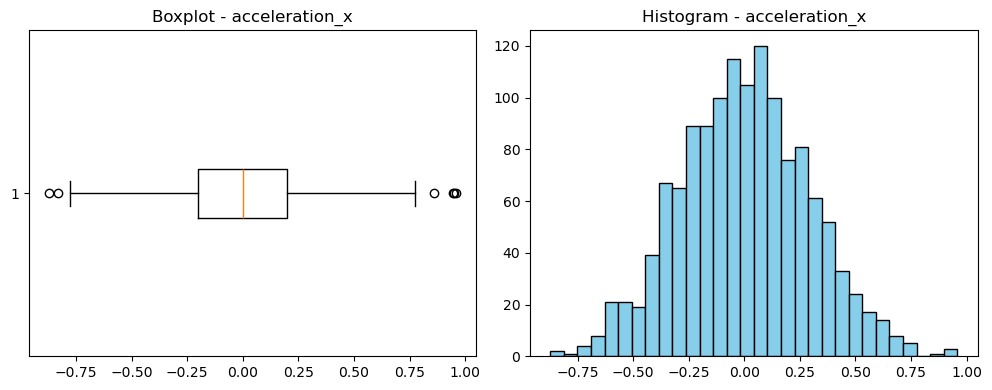

0.018897222746758896


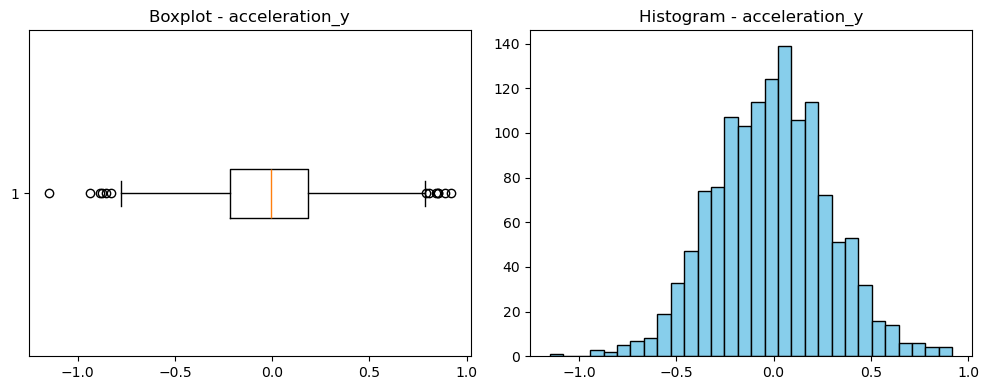

0.033084819239444826


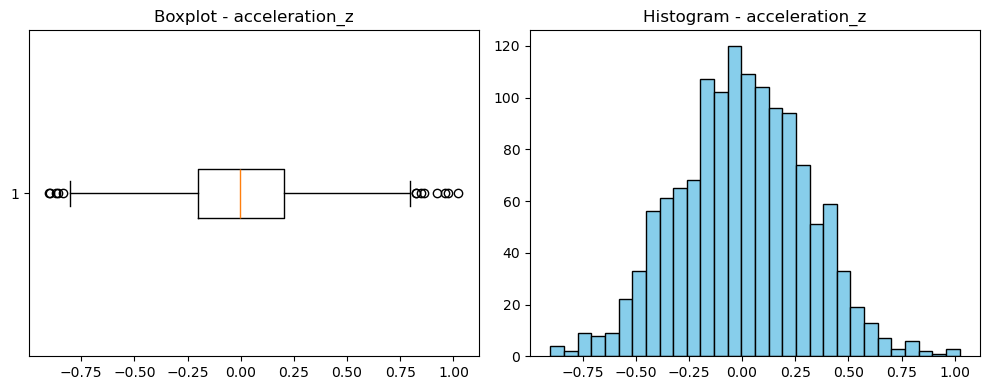

-0.03642990365305273


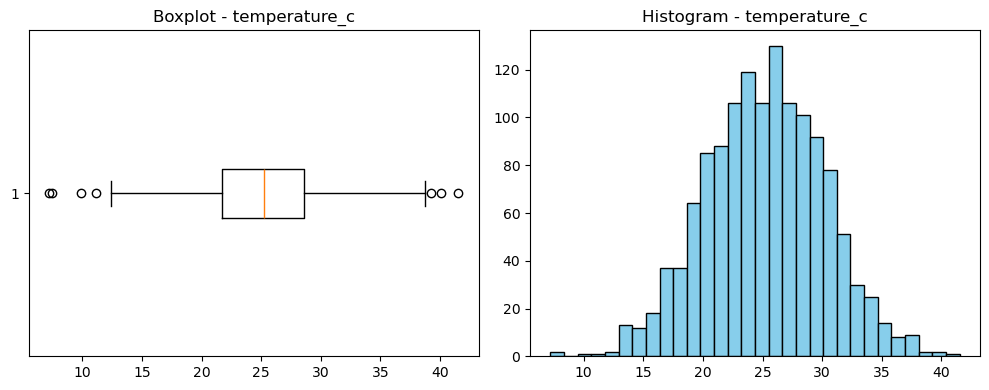

0.021644562736721724


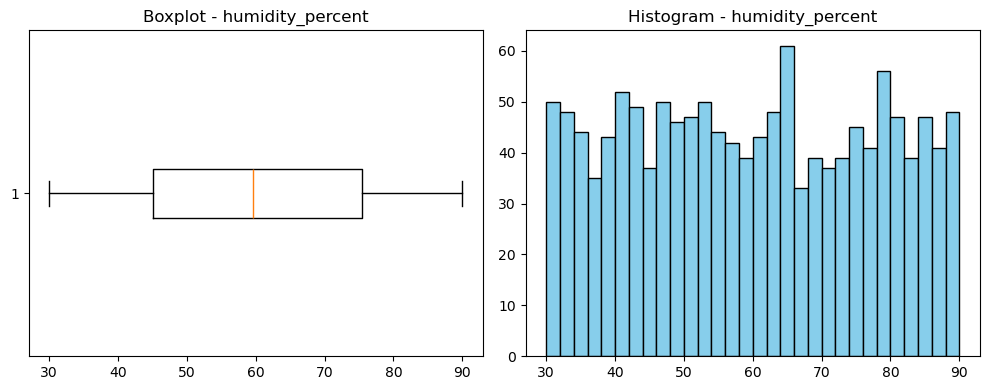

-0.03479935052438318


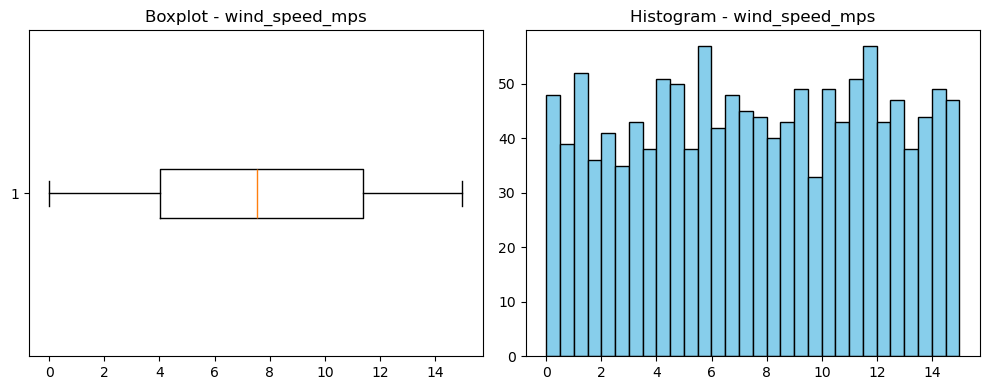

-0.010571881392098349


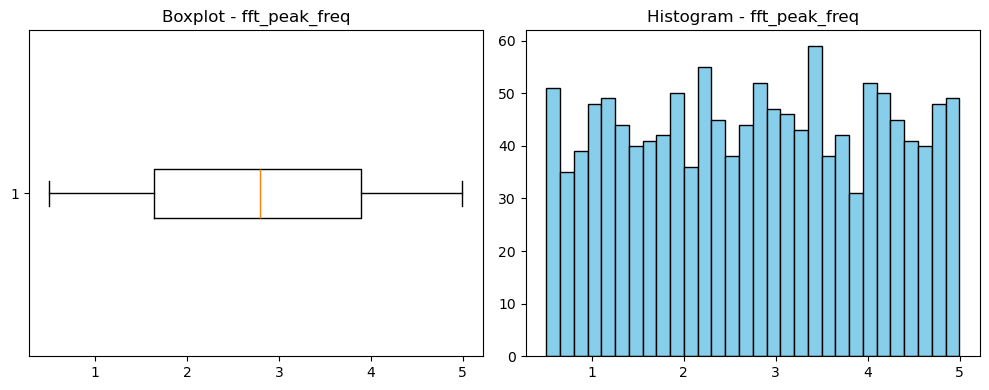

0.0381409288872579


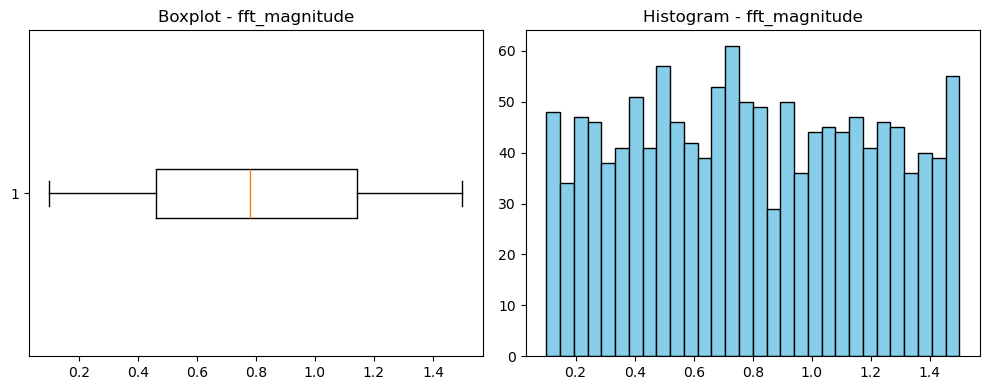

0.1273797610897676


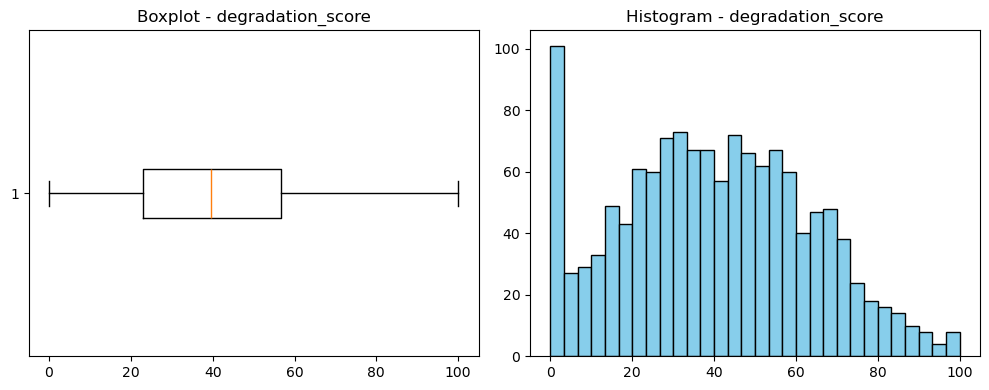

0.2956740065153369


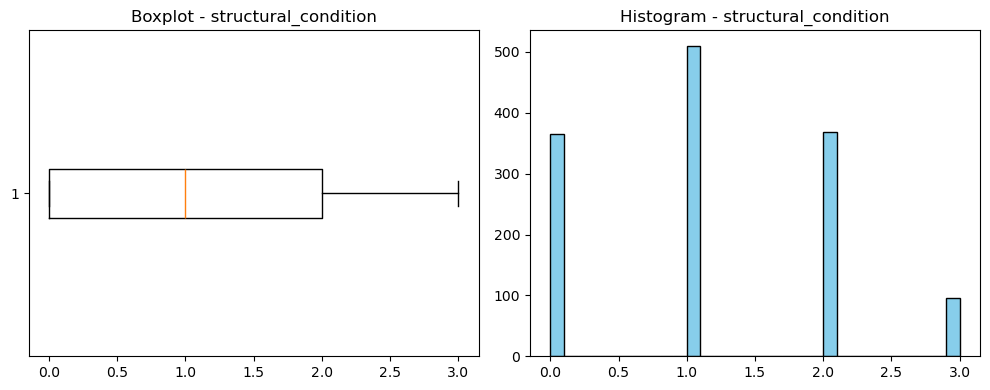

0.1453265258042847


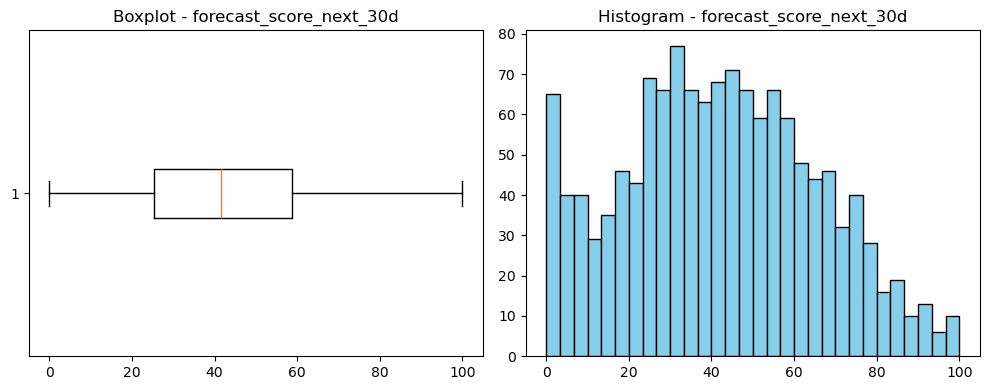

In [152]:
# # Example: check one column
# inspect_column(df, "temperature_c")
# print()

# Example: loop through all numeric columns
for col in df.select_dtypes(include=[float, int]).columns:
    inspect_column(df, col)

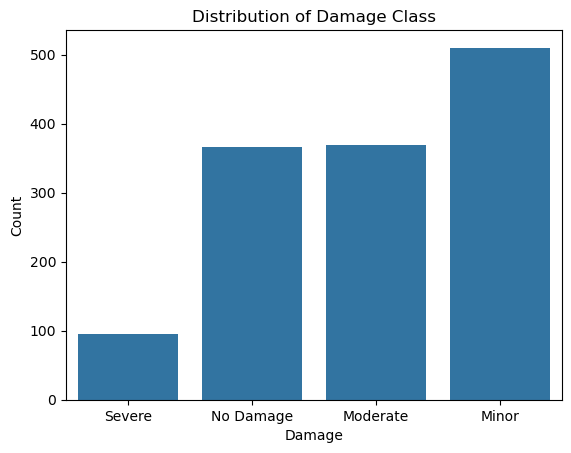

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vertical bars (x-axis = categories, y-axis = counts)
sns.countplot(x="damage_class" , data=df)
plt.title("Distribution of Damage Class")
plt.xlabel("Damage")
plt.ylabel("Count")
plt.show()

In [154]:
import os 
os.makedirs("Data/Processed" , exist_ok=True)
df.to_csv("../Data/Processed/cleaned_bridge_dataset_V1.csv" , index= False)

In [155]:
features = df.drop(["damage_class" , "structural_condition"] , axis= 1)
target =df["structural_condition"]

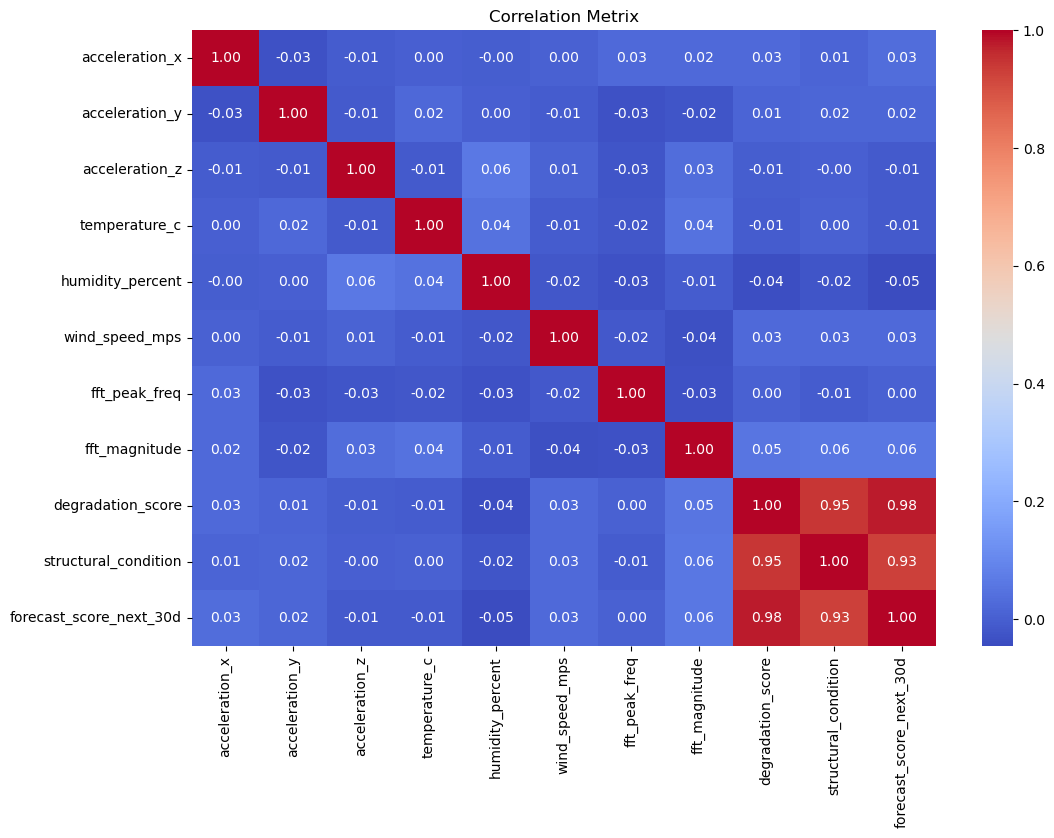

In [156]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12,8))

# Create the heatmap
sns.heatmap(
    corr,
    annot=True,        # display correlation values
    fmt=".2f",         # decimal formatting
    cmap="coolwarm",   # color scheme
    cbar=True
)

plt.title("Correlation Metrix")
plt.show()

The Problem is Non-Trivial: The lack of a simple, direct correlation between any single sensor and the final damage score confirms that this is a complex problem that requires an advanced model. A simple linear model would fail, which justifies your choice of a deep learning solution.

The Inputs are Independent: Your sensor data (the model's inputs) are largely independent, meaning each one provides unique information. This is the ideal scenario for a data fusion model, which aims to combine these diverse signals to make a more accurate and robust prediction.

The Target is Consistent: Your target variables (degradation_score, structural_condition) are highly correlated, meaning they provide a clear, consistent, and reliable signal for your model to learn.